# First Neurons

In [3]:
import numpy as np
import tensorflow as tf

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
np.random.seed(101)
# tf.random.set_seed(101)
tf.set_random_seed(101)

In [8]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [9]:
rand_b =np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [10]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [11]:
add_op = a + b
mult_op = a * b

In [12]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict = { a: rand_a, b: rand_b})
    print(add_result)
    
    print("\n")
    
    mult_result = sess.run(mult_op, feed_dict = { a:rand_a, b: rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## Example Neural Network

In [13]:
n_features = 10
n_dense_neurons = 3

In [14]:
#placeholder for x
x = tf.placeholder( tf.float32, (None, n_features))

In [15]:
b = tf.Variable(tf.zeros([n_dense_neurons]))

W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

In [16]:
xW = tf.matmul(x, W)

In [17]:
z = tf.add(xW, b)

In [18]:
# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)

In [19]:
init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict = { x: np.random.random([1, n_features])})

In [21]:
print(layer_out)

[[0.6371397  0.0208855  0.60887516]]


In [22]:
np.random.random([1,n_features])

array([[0.09714648, 0.10284749, 0.7015073 , 0.89047987, 0.1595603 ,
        0.27557254, 0.67249153, 0.16430312, 0.70137114, 0.48763522]])

## Full Network Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

### Artifical Data (Some Made Up Regression Data)

In [30]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [31]:
x_data

array([ 0.45530311,  0.88481794,  2.69200823,  2.46081783,  4.924218  ,
        5.64442575,  7.41222778,  6.55904835,  9.74245444, 10.56172611])

In [32]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [33]:
import matplotlib.pyplot as plt

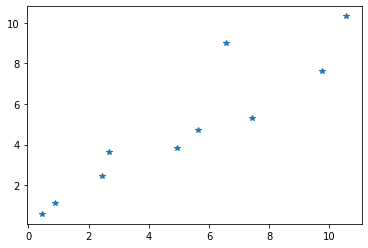

In [34]:
plt.plot(x_data, y_label, "*")

In [29]:
np.random.rand(2)

array([0.81226589, 0.67026042])

In [35]:
m = tf.Variable(0.81)
b = tf.Variable(0.67)

In [36]:
error = 0

for x,y in zip(x_data, y_label):
    
    y_hat = m*x + b
    
    error += (y-y_hat)**2

In [37]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [38]:
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

In [41]:
final_slope

0.8380219

In [42]:
final_intercept

0.58936435

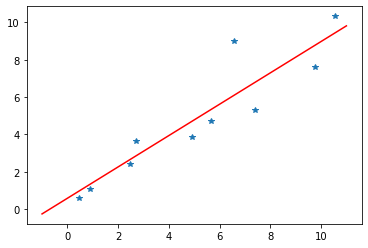

In [43]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, "r")

plt.plot(x_data, y_label, "*")